<a href="https://colab.research.google.com/github/raneymjohnGit/Austin_TX_House_Listings/blob/jayanbranch/Jayan/Analysis/Further_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copy paste this code
# Install psycopg2-binary
! pip install psycopg2-binary 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Copy paste this code
# URL for Heroku DB
raw_db_url='dpaclsxjrpfluk:4fa14e6fdb846bd14d1a9eda261d554fab9688f2f4dd5483bc38d94cdee010ad@ec2-3-219-52-220.compute-1.amazonaws.com:5432/d7s0s0hs0a5lar'

In [ ]:
 # Copy paste this code
 # Import SQL Alchemy, format url string for SQLAlchemy
 
import subprocess
from sqlalchemy.engine.create import create_engine

# Convert binary string to a regular string & remove the newline character
db_url = raw_db_url

# Convert "postgres://<db_address>"  --> "postgresql+psycopg2://<db_address>" needed for SQLAlchemy
final_db_url = "postgresql+psycopg2://" + db_url.lstrip("postgres://")  # lstrip() is more suitable here than replace() function since we only want to replace postgres at the start!


# Create SQLAlchemy engine
# ------------------------
engine = create_engine(final_db_url)

# Read in cleaned data from SQL as DataFrame

In [ ]:
# SQL to dataframe using sqlalchemy
import pandas as pd

df = pd.read_sql_table('cleaned_data_1', engine)
df.head()

,index,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,month_year,latest_saledate_dt,dec_2019_price,jan_2021_price,price_per_sqft
0,6702,29415933,austin,5804 Bullard Dr,78757,"5804 Bullard Dr, Austin, TX 78757 is a single ...",30.336634,-97.750031,1.98,3,...,1153,16,2.0,3,1,2019-06,2019-06-21,470317,547114,202
1,4729,58304707,austin,823 Walnut Creek Dr,78753,"823 Walnut Creek Dr, Austin, TX 78753 is a sin...",30.386883,-97.668449,1.98,3,...,814,15,2.0,3,1,2019-02,2019-02-27,418299,486603,211
2,7501,29482307,austin,4410 Garnett St,78745,Complete remodel of a gorgeous vintage home. O...,30.218693,-97.770554,1.98,3,...,792,13,2.0,4,1,2019-07,2019-07-02,598560,696298,343
3,5146,29513449,austin,11412 Gun Fight Ln,78748,Large move-in ready Shady Hollow home loaded w...,30.162312,-97.854210,1.98,3,...,1633,17,4.0,5,2,2019-03,2019-03-20,481300,559890,137
4,5256,29479870,austin,1311 Casey St,78745,"1311 Casey St, Austin, TX 78745 is a single fa...",30.225712,-97.781837,1.98,3,...,803,12,2.0,3,1,2019-03,2019-03-11,374344,435470,300


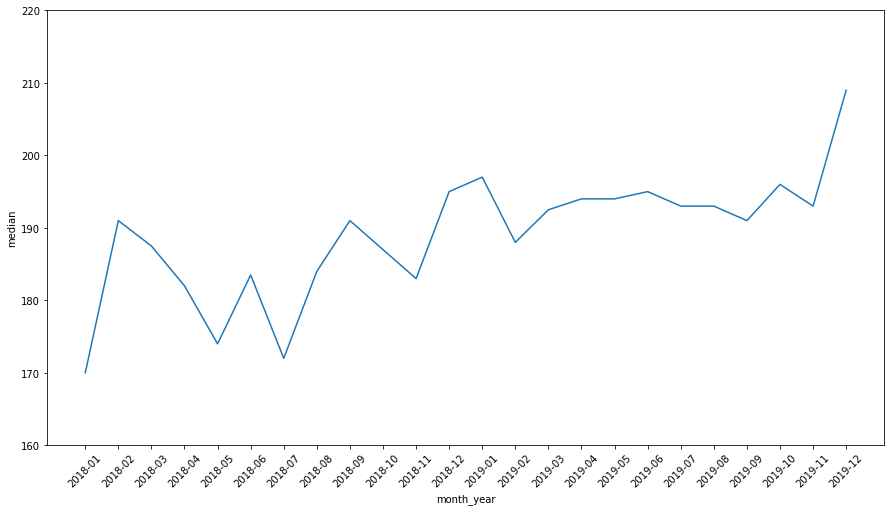

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


median_prices_by_month = df.groupby(['month_year'])['price_per_sqft'].median().to_frame('median').reset_index()

plt.figure(figsize = (15,8))
plt.ylim(160, 220)
plt.xticks(rotation=45)
sns.lineplot(x = 'month_year', y = 'median', data = median_prices_by_month)

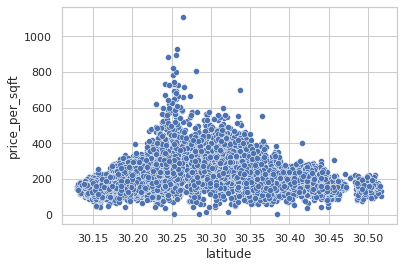

In [ ]:

sns.set(style='whitegrid')
sns.scatterplot(x="latitude",
                    y="price_per_sqft",
                    data=df)

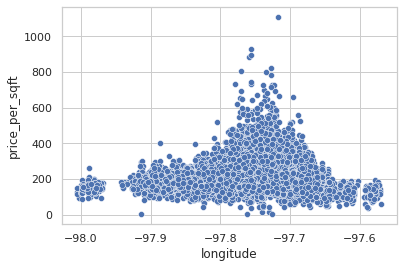

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(x="longitude",
                    y="price_per_sqft",
                    data=df)

In [ ]:
import numpy as np

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    miles = 6367 * c * 0.621371
    return miles


In [ ]:
for index, row in df.iterrows():
    df.loc[index, 'distance'] = haversine(row['longitude'], row['latitude'],-97.74281, 30.26812)

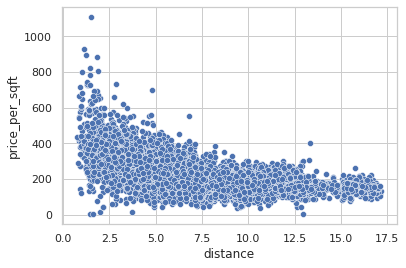

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(x="distance",
                    y="price_per_sqft",
                    data=df)

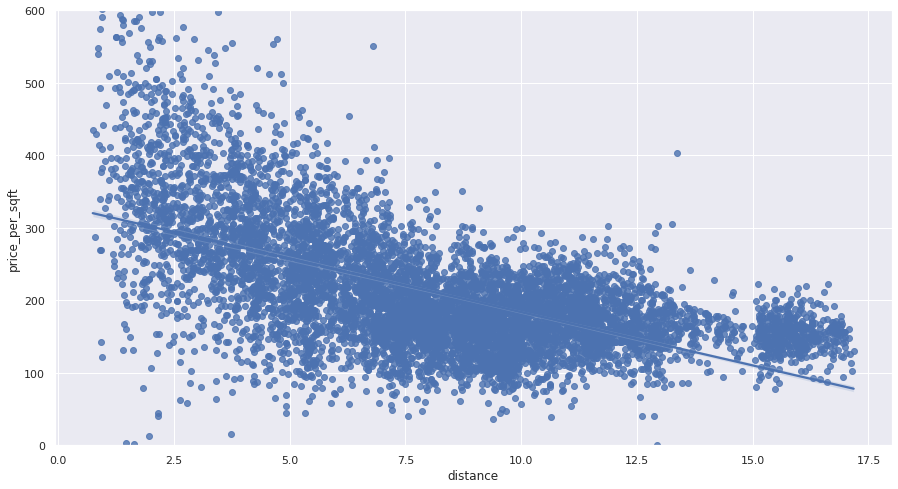

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.ylim(0, 600)
sns.regplot(x="distance", y="price_per_sqft", data=df);



In [ ]:
spearman = df['distance'].corr(df['price_per_sqft'], method='spearman')
pearsons = df['distance'].corr(df['price_per_sqft'])

In [ ]:
print(pearsons, spearman)

-0.5897376855206026 -0.5813348582368388


In [ ]:
# Import the function "PolynomialFeatures" from sklearn, to preprocess our data
# Import LinearRegression model from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..

X = df[['distance']]
y = df.price_per_sqft
pre_process = PolynomialFeatures(degree=2)
# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[ 1.        ,  4.75040764, 22.56637275],
       [ 1.        ,  9.32154968, 86.89128837],
       [ 1.        ,  3.79302946, 14.38707247],
       ...,
       [ 1.        ,  9.90726958, 98.15399045],
       [ 1.        ,  4.30634118, 18.54457435],
       [ 1.        ,  2.75915763,  7.61295083]])

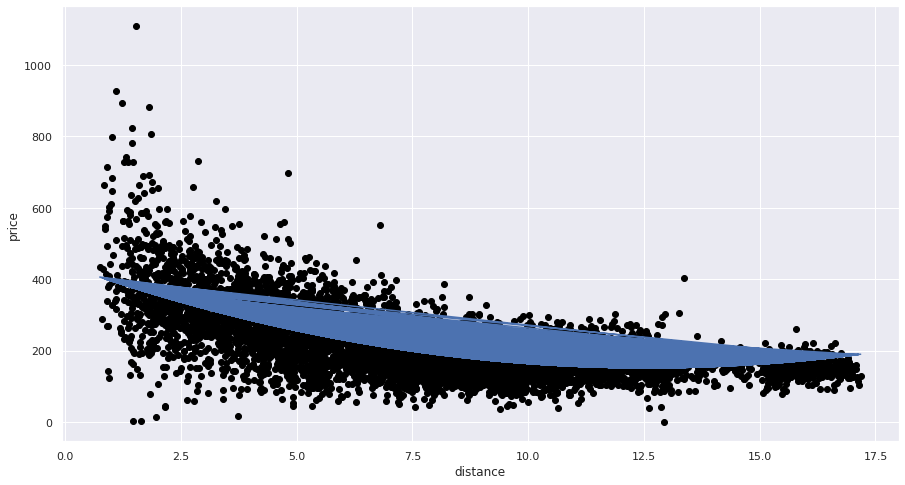

In [ ]:
pr_model = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y)
# Store our predicted values in the variable y_new
y_pred = pr_model.predict(X_poly)
# Plot our model on our data
plt.scatter(X, y, c = "black")
plt.xlabel("distance")
plt.ylabel("price")
plt.plot(X, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

4466.063204530797

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Coefficient of Determination:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 47.871201300149096
Mean Squared Error: 4466.063204530797
Root Mean Squared Error: 66.82861067335455
Coefficient of Determintion: 0.45307700704662235


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.drop(columns=['zpid', 'index', 'city', 'streetAddress', 'description', 'latest_saledate', 'latest_salemonth', 'latest_saleyear', 'month_year', 'latest_saledate_dt', 'jan_2021_price', 'homeType', 'latestprice', 'price_per_sqft'])

In [ ]:
df_encode = df.copy(deep=True)

In [ ]:
# Hot Encode Zip Code

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df_encode[['zipcode']])
df_encode[one_hot.categories_[0]] = encoded.toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Change dataframe settings to be able to see all columns
pd.set_option('display.max_columns', None)

# drop zipcode string column, check dataframe for hot encoding
df_encode = df_encode.drop(columns='zipcode')
df_encode.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,parkingSpaces,yearBuilt,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,dec_2019_price,distance,78617,78660,78702,78703,78704,78705,78717,78721,78722,78723,78724,78725,78726,78727,78728,78729,78730,78731,78732,78733,78735,78736,78737,78739,78741,78744,78745,78746,78747,78748,78749,78750,78751,78752,78753,78754,78756,78757,78758,78759
0,30.336634,-97.750031,1.98,3,False,True,True,True,False,True,5,1958,0,8,4,0,0,0,0,0,10018.0,2226.0,1,0,1,1,0.800000,6.666667,1153,16,2.0,3,1,470317,4.750408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30.386883,-97.668449,1.98,3,False,True,True,True,False,False,5,1961,0,8,6,0,0,0,0,0,10018.0,1706.0,1,0,1,1,2.400000,5.000000,814,15,2.0,3,1,418299,9.321550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30.218693,-97.770554,1.98,3,False,True,True,True,False,True,5,1941,0,8,5,0,0,0,0,0,15246.0,1676.0,1,0,1,1,1.366667,3.333333,792,13,2.0,4,1,598560,3.793029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.162312,-97.854210,1.98,3,True,True,True,True,False,True,5,1988,0,3,4,0,0,0,0,0,7361.0,3279.0,1,0,1,1,1.100000,7.333333,1633,17,4.0,5,2,481300,9.877378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.225712,-97.781837,1.98,3,False,True,True,True,False,False,5,1958,0,4,4,0,0,0,0,0,9931.0,1168.0,1,0,1,1,1.733333,4.000000,803,12,2.0,3,1,374344,3.740895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X_var_df = df_encode.drop(columns='dec_2019_price')

X = X_var_df
y = df_encode['dec_2019_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
params = {'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.748699305012683

In [ ]:
y_pred = rf.predict(X_test)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


Mean Absolute Error: 54983.52331081631
Mean Squared Error: 6545968523.929899
Root Mean Squared Error: 80907.15990522655


In [ ]:
# Splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X_var_df = df_encode.drop(columns=['dec_2019_price', 'distance'])

X = X_var_df
y = df_encode['dec_2019_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
params = {'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name']. An error will be raised in 1.2.
  FutureWarning,


0.7500805765419107

In [ ]:
params = {'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(**params))
sel.fit(X_train, y_train)
sel.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name']. An error will be raised in 1.2.
  FutureWarning,


array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

10

In [ ]:
print(selected_feat)

Index([         'latitude',         'longitude',         'yearBuilt',
             'lotSizeSqFt',    'livingAreaSqFt', 'avgSchoolDistance',
         'avgSchoolRating',     'avgSchoolSize',               78702,
                     78704],
      dtype='object')


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

ada_reg = AdaBoostRegressor(n_estimators=400)
ada_reg.fit(X_train, y_train)
ada_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.43996202707124255